In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

style.use('ggplot')

# SVM (Support Vector Machine)

#### TL; DR
To develop a deeper understanding of the **Support Vector Machine** classification model 


#### References

[Python Code Post 1](https://pythonprogramming.net/svm-in-python-machine-learning-tutorial/)

[Python Code Post 2](https://pythonprogramming.net/svm-optimization-python-machine-learning-tutorial/?completed=/svm-in-python-machine-learning-tutorial/)

[Python Code Post 3](https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/?completed=/svm-optimization-python-2-machine-learning-tutorial/)

##### Different Kernels:

**Kernels** are similarity functions and used when the shape of your data is non-linear

This is what makes SVM's powerful ML algorithms is that you can change the kernels (i.e. polynomials, sigmoid, radian basis functions, etc...)

**Inner or dot product between 2 variables gives a projection, overlapping or a degree of similarity**

*"Kernels are similarity functions, which take two inputs and return a similarity using inner products. Since this is a machine learning tutorial, some of you might be wondering why people don't use kernels for machine learning algorithms, and, I am here to tell you that they do! Not only can you create your own new machine learning algorithms with Kernels, you can also translate existing machine learning algorithms into using Kernels."*

*"What kernels are going to allow us to do, possibly, is work in many dimensions, without actually paying the processing costs to do it. Kernels do have a requirement: They rely on inner products. For the purposes of this tutorial, "dot product" and "inner product" are entirely interchangeable."*

[Blog Post 1](https://pythonprogramming.net/kernels-with-svm-machine-learning-tutorial/?completed=/predictions-svm-machine-learning-tutorial/)

[Blog Post 2](https://pythonprogramming.net/soft-margin-svm-machine-learning-tutorial/?completed=/why-use-kernel-with-svm-machine-learning-tutorial/)

[Python Code Post 3](https://pythonprogramming.net/soft-margin-kernel-cvxopt-svm-machine-learning-tutorial/?completed=/soft-margin-svm-machine-learning-tutorial/)


#### Main Takeaways

- Convex Optimization in the *fit* method
- Optimize to find decision boundary & support vector hyperplanes

### Create Simple Dictionary of Toy Data

In [18]:
data_dict = {-1: np.array([[1, 7], [2, 8], [3, 8],]),
             1: np.array([[5, 1], [6, -1], [7,3]])}

In [39]:
class SupportVectorMachine:
    
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    def fit(self, data):
        # optimization problem
        self.data = data
        # {||w||: [w, b]}
        opt_dict = {}
        
        transforms = [[1,1], [-1,1], [1,-1], [-1,-1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        # OPTIMIZATION STOPPING CRITERIA: support vectors yi(xi.w+b) = 1 (i.e. 1.001)
        
        step_sizes = [self.max_feature_value * 0.1, 
                      self.max_feature_value * 0.01,
                      self.max_feature_value * 0.001]
        
        # extremely expensive
        b_range_multiple = 5
        
        # we dont need to take as small of steps w/ b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value * 10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            # convex optimization
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                 self.max_feature_value*b_range_multiple,
                                 step*b_multiple):
                    for transformation in transforms:
                        w_t = w * transformation
                        found_option = True
                        # weakest link the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t, xi) +b) >= 1:
                                    found_option = False
                        if found_option:
                            # linalg.norm = distance
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step
                    
            norms = sorted([n for n in opt_dict])
            # ||w|| : [w, b]
            opt_choice = opt_dict[norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0] + step * 2
            
            for i in self.data:
                for xi in self.data[i]:
                    yi = i
                    print(xi, ':', yi*(np.dot(self.w, xi) + self.b))
    
    def predict(self, features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features), self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*',
                           c=self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], 
                          x[1], 
                          s=100, 
                          color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x, w, b, v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x+b) = 1
        # psv (positive support vector hyperplane)
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')
        
        # (w.x+b) = -1
        # nsv (negative support vector hyperplane)
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')
        
        # (w.x+b) = 1
        # db (decision boundaru)
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--')
        

Optimized a step.
[1 7] : 4.799999999999098
[2 8] : 4.799999999999098
[3 8] : 3.9999999999992486
[5 1] : 3.199999999999399
[ 6 -1] : 5.599999999998948
[7 3] : 3.199999999999399
Optimized a step.
[1 7] : 1.5199999999992362
[2 8] : 1.5199999999992362
[3 8] : 1.1999999999993876
[5 1] : 1.6799999999992516
[ 6 -1] : 2.639999999998798
[7 3] : 1.6799999999992516
Optimized a step.
[1 7] : 1.2239999999999465
[2 8] : 1.2239999999999465
[3 8] : 1.000000000000098
[5 1] : 1.015999999998539
[ 6 -1] : 1.6879999999980846
[7 3] : 1.015999999998539
Prediction: -1.0
Prediction: -1.0
Prediction: -1.0
Prediction: -1.0
Prediction: 1.0
Prediction: -1.0
Prediction: 1.0
Prediction: -1.0


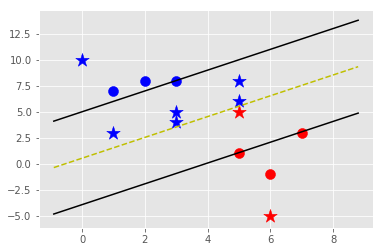

In [47]:
svm = SupportVectorMachine()
svm.fit(data=data_dict)

predict_us = [[0, 10],
              [1, 3],
              [3, 4],
              [3, 5],
              [5, 5],
              [5, 6],
              [6, -5],
              [5, 8]]

for p in predict_us:
    print(f'Prediction: {svm.predict(p)}')
    
svm.visualize()

---

## Hyperparameters

### Kernels

*How to choose a kernel*

Whole discussion on how to approach selecting/testing kernels but it appears on the shape/geometry of your data. Unfortunately many problems are interpretable or incomprehendable from a spatial standpoint (limited to 3 dimensions). 

A good default is to start with [Radial Basis Function (RBF)](https://en.wikipedia.org/wiki/Radial_basis_function_kernel) for non-linearity.

$$K(x,x')=exp(-\gamma||x-x'||^2)$$

where $\gamma=\frac{1}{2\sigma^2}$

One must be careful applying data mining techniques like optimizing based on cross validation scores and can typically lead to overfitting.

https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm

### Hard/Soft Margins

In order to avoid overfitting your data to your SVM decision boundary one may want to employ a "soft margin" to relax or generalize for the allowance for errors . Essentially a soft margin:

*"has the same margin-maximizing objective (distance between the support vectors) but adds an additional constraint to each lagrange multiplier associated with support vector bounded by C... The result is that soft-margin SVM could choose a decision boundary that is less likely to overfit."* ~[Stackoverflow](https://stackoverflow.com/questions/4629505/svm-hard-or-soft-margins/4630731)

$$argmin_{w}=\frac{1}{2}||\bar{w}||^2+C\sum_{i}\xi_{i}$$

where $\xi_{i}$ is the "slack" and $C$ is a constant multiplier for the sum of slack's influence. Lower $C$ the lower the effects of the slacks to the magnitude of vector $w$

In [48]:
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y))**p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-np.linalg.norm(x-y)**2 / (2*(sigma**2)))

### Parameters

#### For classifications > 2 (more than just binary)

[Blog Post 1](https://pythonprogramming.net/support-vector-machine-parameters-machine-learning-tutorial/?completed=/soft-margin-kernel-cvxopt-svm-machine-learning-tutorial/)

Approaches:

- OVR ("One Verse Rest")

- OVO ("One v. One")
